In [4]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [5]:
# Simulate data

N = 100
D = 100

X = np.random.randn(N, D)
PHI = np.column_stack((np.array([[1]*N]).T, X))

w_true = np.array([3.8, 5.3, 3.9] + [0]*(D - 2))

y = PHI.dot(w_true) + np.random.randn(N)

In [6]:
# Functions

def objective(N, y, y_hat, lmda, w):
    return (1/(2*N))*np.sum((y - y_hat)**2) + (lmda/N)*np.sum(np.abs(w))

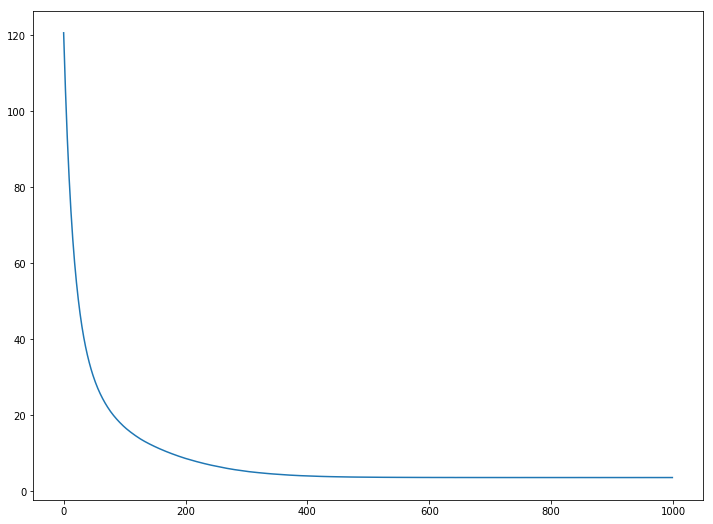

In [41]:
w = np.random.randn(D + 1)

J = []
lmda = 25
eta = 1e-2
epochs = 1000

for t in xrange(epochs):
    w_reg = w
    w_reg[0] = 0
    y_hat = PHI.dot(w)
    J.append(objective(N, y, y_hat, lmda, w))
    w -= eta * (1/N) * (PHI.T.dot(y_hat - y) + lmda*np.sign(w_reg))
    
plt.figure(figsize = (12, 9))
plt.plot(J)

In [42]:
# Report R-squared

R2 = 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

print("R-squared: {}".format(R2))

R-squared: 0.973225410358


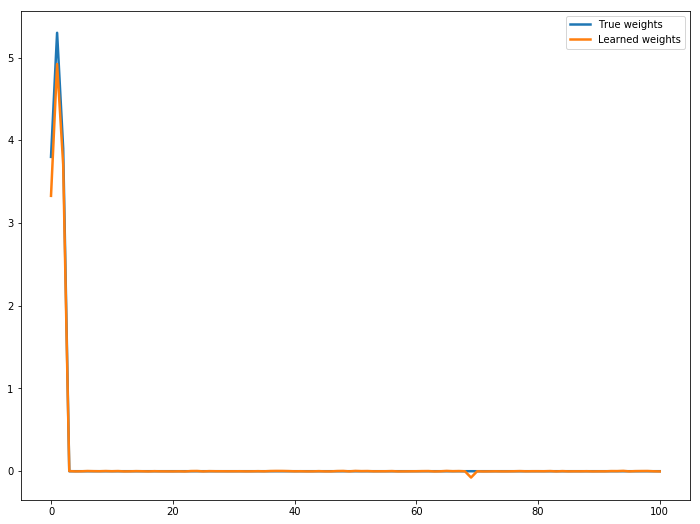

In [43]:
plt.figure(figsize = (12, 9))
plt.plot(w_true, linewidth = 2.5, label = "True weights")
plt.plot(w, linewidth = 2.5, label = "Learned weights")
plt.legend()